In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizerFast, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
act_data = pd.read_csv("./data/BERT_action.csv")

# 행동을 설명하는 문장

In [5]:
act_data

,action,효능,Unnamed: 2
0,명상,부교감신경을 활성화함으로써 긴장된 몸을 이완상태로 유도한다. 심신이 안정되고 편안해...,NaN
1,명상,명상을 하면 대뇌피질을 활동이 억제되고 안정화된다. 이 의미는 집념과 감정적 동요에...,NaN
2,명상,명상을 하면 알파파와 세타파가 나와서 편안한 이완상태를 만든다. 이 상태는 면역력이...,NaN
3,산책,"자리에 가만히 앉아있을 때보단 걸어 다닐 때 많은 풍경과 사람, 사물을 스쳐지나가게...",NaN
4,산책,산책을 꾸준히 하면 고관절의 움직임이 좋아져 유연성과 기동성이 향상된다. 또 걷기는...,NaN
5,산책,특별한 이유 없이 마음이 허전하고 우울할 때도 있다. 이럴 땐 산책이 기분전환을 할...,NaN
6,등산,"등산을 하면 심장의 용적은 커지며 탄력성이 증가해서 혈관이 깨끗해지고, 세포에서 산...",NaN
7,등산,주된 거주지가 도심 속이나 그 외곽지역이 되면서 좀처럼 맑은 공기를 마실 기회가 ...,NaN
8,등산,등산이 심폐기능을 향상시키는 데는 다 이유가 있다. 달리기는 속도와 경사에 따라서...,NaN
9,등산,"숲이 내뿜는 피톤치드와 테르펜은 유해균을 죽여주며, 노폐물을 배출시켜주고, 신진대사...",NaN


# 차원을 설명하는 문장

In [6]:
dim_data = pd.read_csv("./data/BERT_dims.csv")

In [7]:
dim_data

,차원,설명
0,에너지,신체에 활력를 넣어줌.활동적이고 열정적으로 만듬
1,회복,병으로 인해서 상태가 안 좋아진 신체를 다시 원래대로 되돌림
2,순환,기 또는 혈류가 막혀 있는 것을 풀어줌. 혹은 이를 도와줌
3,정화,신체에 바이러스 혹은 세균을 제거함으로써. 신체의 원래 기능으로 되돌림


In [8]:
tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
model = BertModel.from_pretrained("kykim/bert-kor-base")

Some weights of the model checkpoint at kykim/bert-kor-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# BERT 모델을 사용해서 문장의 유사도 확인
현재 bert의 per-train의 output을 mean_pooling을 이용해서 sent vector로 바꾼 후 유사도를 계산하는 방식

In [9]:
def word_sim(sent1 , sent2):
    words = [sent1, sent2]
    tokens = {'input_ids' : [] , 'attention_mask' : []}

    
    for word in words:
        new_tokens = tokenizer.encode_plus(word , max_length=128, truncation= True , padding='max_length' , return_tensors='pt')
        tokens['input_ids'].append(new_tokens['input_ids'][0])
        tokens['attention_mask'].append(new_tokens['attention_mask'][0])
        
    tokens['input_ids'] = torch.stack(tokens['input_ids'])
    tokens['attention_mask'] = torch.stack(tokens['attention_mask'])
    
    outputs = model(**tokens)
    embeddings = outputs.last_hidden_state
    attention_mask = tokens['attention_mask']
    mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
    masked_embeddings = embeddings * mask
    summed = torch.sum(masked_embeddings,1)
    summed_mask = torch.clamp(mask.sum(1), min=1e-9)
    mean_pooled = summed / summed_mask
    mean_pooled = mean_pooled.detach().numpy()
    return cosine_similarity( mean_pooled[0].reshape(1,-1) , mean_pooled[1].reshape(1,-1))[0][0]

In [10]:
act_dim = pd.DataFrame(columns = ['에너지','회복','순환','정화'], index = act_data.index)
act_dim['행동'] = act_data['action']
act_dim['효능'] = act_data['효능']

In [11]:
e_est = []
e_sents = dim_data['설명'][0]
for idx in act_data.index:
    e_est.append(word_sim(e_sents,act_data['효능'][idx]))
act_dim['에너지'] = e_est

In [12]:
h_est = []
h_sents = dim_data['설명'][1]
for idx in act_data.index:
    h_est.append(word_sim(h_sents,act_data['효능'][idx]))
act_dim['회복'] = h_est

In [13]:
c_est = []
c_sents = dim_data['설명'][2]
for idx in act_data.index:
    c_est.append(word_sim(c_sents,act_data['효능'][idx]))
act_dim['순환'] = c_est

In [14]:
p_est = []
p_sents = dim_data['설명'][3]
for idx in act_data.index:
    p_est.append(word_sim(p_sents,act_data['효능'][idx]))
act_dim['정화'] = p_est

# 행동의 각 문장에 대해서 차원의 유사도 계산

In [15]:
dim_data

,차원,설명
0,에너지,신체에 활력를 넣어줌.활동적이고 열정적으로 만듬
1,회복,병으로 인해서 상태가 안 좋아진 신체를 다시 원래대로 되돌림
2,순환,기 또는 혈류가 막혀 있는 것을 풀어줌. 혹은 이를 도와줌
3,정화,신체에 바이러스 혹은 세균을 제거함으로써. 신체의 원래 기능으로 되돌림


In [16]:
act_dim

,에너지,회복,순환,정화,행동,효능
0,0.555498,0.463638,0.523064,0.508758,명상,부교감신경을 활성화함으로써 긴장된 몸을 이완상태로 유도한다. 심신이 안정되고 편안해...
1,0.520487,0.411026,0.522645,0.500016,명상,명상을 하면 대뇌피질을 활동이 억제되고 안정화된다. 이 의미는 집념과 감정적 동요에...
2,0.540240,0.409235,0.477115,0.480039,명상,명상을 하면 알파파와 세타파가 나와서 편안한 이완상태를 만든다. 이 상태는 면역력이...
3,0.542683,0.482949,0.552460,0.520197,산책,"자리에 가만히 앉아있을 때보단 걸어 다닐 때 많은 풍경과 사람, 사물을 스쳐지나가게..."
4,0.550853,0.489250,0.566072,0.510094,산책,산책을 꾸준히 하면 고관절의 움직임이 좋아져 유연성과 기동성이 향상된다. 또 걷기는...
5,0.486109,0.462782,0.508622,0.451369,산책,특별한 이유 없이 마음이 허전하고 우울할 때도 있다. 이럴 땐 산책이 기분전환을 할...
6,0.571226,0.486693,0.599274,0.518732,등산,"등산을 하면 심장의 용적은 커지며 탄력성이 증가해서 혈관이 깨끗해지고, 세포에서 산..."
7,0.531447,0.561187,0.601872,0.546045,등산,주된 거주지가 도심 속이나 그 외곽지역이 되면서 좀처럼 맑은 공기를 마실 기회가 ...
8,0.441779,0.453492,0.533592,0.503961,등산,등산이 심폐기능을 향상시키는 데는 다 이유가 있다. 달리기는 속도와 경사에 따라서...
9,0.570472,0.502970,0.621268,0.581976,등산,"숲이 내뿜는 피톤치드와 테르펜은 유해균을 죽여주며, 노폐물을 배출시켜주고, 신진대사..."


In [17]:
df_idx = [0]
pre_word = "명상"
for idx in act_dim.index:
    if pre_word != act_dim['행동'][idx]:
        pre_word = act_dim['행동'][idx]
        df_idx.append(idx)
df_idx.append(idx)

In [18]:
def get_est(callback):
    est = []
    heatmap = []
    for idx in range(0,len(df_idx)-1):
        #print(df_idx[idx],df_idx[idx+1])
        tmp = np.array(act_dim[['에너지','회복','순환','정화']].loc[df_idx[idx]:df_idx[idx+1]])
        tmp = callback(tmp, axis=0)
        heatmap.append(tmp)
    return heatmap

# 각 유사도에 대해서 callback을 사용해서 추정
min , mean , max에 대해서 추정

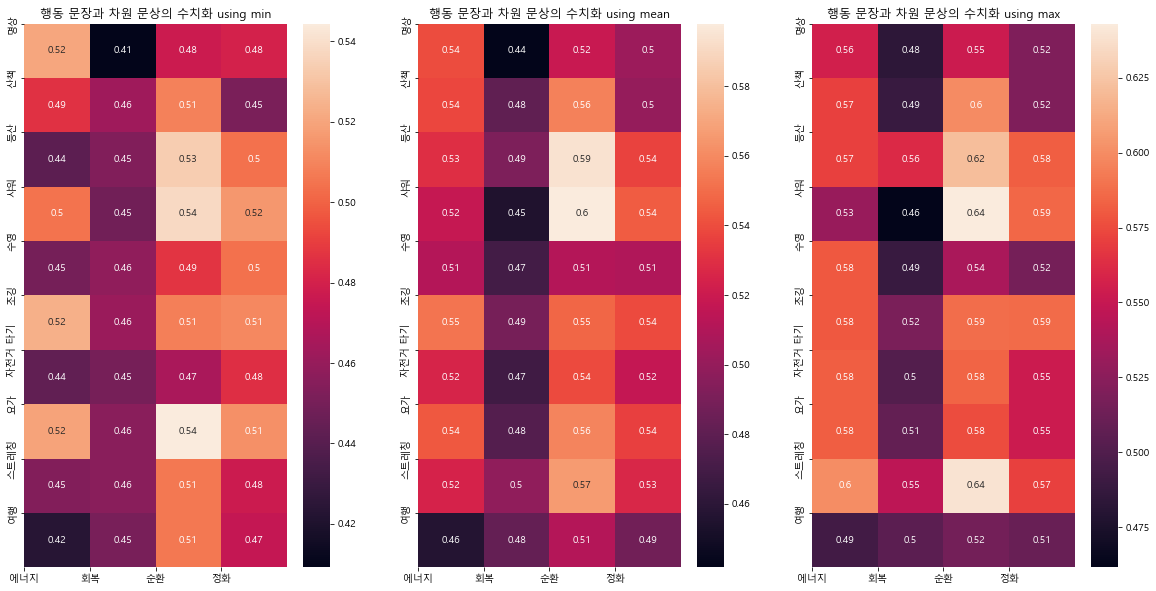

In [19]:
plt.rc('font', family='Malgun Gothic')
f,(ax1,ax2,ax3) = plt.subplots(1,3)
f.set_figheight(10)
f.set_figwidth(20)
action_list = ['명상' , '산책' , '등산' , '샤워' , '수영' , '조깅' , '자전거 타기' , '요가' , '스트레칭' , '여행']
dim_list = ['에너지','회복','순환','정화']

g1 = sns.heatmap(get_est(np.min),cbar=True,annot=True , ax=ax1)
ax1.set_title('행동 문장과 차원 문상의 수치화 using min')
ax1.set_yticks(np.arange(0,len(action_list)))
ax1.set_yticklabels(action_list)
ax1.set_xticks(np.arange(0,len(dim_list)))
ax1.set_xticklabels(dim_list)

g2 = sns.heatmap(get_est(np.mean),cbar=True,annot=True, ax=ax2)
ax2.set_title('행동 문장과 차원 문상의 수치화 using mean')
ax2.set_yticks(np.arange(0,len(action_list)))
ax2.set_yticklabels(action_list)
ax2.set_xticks(np.arange(0,len(dim_list)))
ax2.set_xticklabels(dim_list)

g3 = sns.heatmap(get_est(np.max),cbar=True,annot=True, ax=ax3)
ax3.set_title('행동 문장과 차원 문상의 수치화 using max')
ax3.set_yticks(np.arange(0,len(action_list)))
ax3.set_yticklabels(action_list)
ax3.set_xticks(np.arange(0,len(dim_list)))
ax3.set_xticklabels(dim_list)

plt.show()

# Todo
1. 현재 BERT의 hidden_layer에서 다시 mean pooling을 이용해서 sent vector를 만듬 -> max pooling 혹은 output으로만 유사도를 계산
2. 현재 사용하는 모델이 부적적하다. -> 다른 한국어 BERT모델로 변경 